In [3]:
#depth first search
from collections import defaultdict
v,e=map(int,input("Enter the number of Vertices and Edges in the Graph:").split())
graph=defaultdict(list)
print(f"Enter {e} paths:")
for i in range(e):
 s,d=input(f"Enter Path {i+1}: ").split()
 graph[s].append(d)
 graph[d].append(s)
graph

Enter the number of Vertices and Edges in the Graph:7 9
Enter 9 paths:
Enter Path 1: A B
Enter Path 2: B C
Enter Path 3: C E
Enter Path 4: A C
Enter Path 5: B D
Enter Path 6: C D
Enter Path 7: A F
Enter Path 8: G A
Enter Path 9: G C
defaultdict(<class 'list'>, {'A': ['B', 'C', 'F', 'G'], 'B': ['A', 'C', 'D'], 'C': ['B', 'E', 'A', 'D', 'G'], 'E': ['C'], 'D': ['B', 'C'], 'F': ['A'], 'G': ['A', 'C']})


In [6]:
#depth first search
from collections import defaultdict
def dfs(graph,start,visited,path):
 path.append(start)
 visited[start]=True
 for neighbour in graph[start]:
     if visited[neighbour]==False:
      dfs(graph,neighbour,visited,path)
 return path
 
v,e=map(int,input("Enter the number of Vertices and Edges in the Graph:").split())
graph=defaultdict(list)
print(f"Enter {e} paths:")
for i in range(e):
 s,d=input(f"Enter Path {i+1}: ").split()
 graph[s].append(d)
 graph[d].append(s)
path=[]
visited=defaultdict(bool)
finalpath=dfs(graph,'A',visited,path)
print(graph)
print(finalpath)

Enter the number of Vertices and Edges in the Graph:7 9
Enter 9 paths:
Enter Path 1: A B
Enter Path 2: B C
Enter Path 3: D E
Enter Path 4: A E
Enter Path 5: A F
Enter Path 6: G C
Enter Path 7: A D
Enter Path 8: B D
Enter Path 9: C F
['A', 'B', 'C', 'G', 'F', 'D', 'E']


In [10]:
#breadth first search
from collections import defaultdict, deque
def bfs(graph,start,visited,path):
 queue=deque()
 path.append(start)
 queue.append(start)
 visited[start]=True
 while len(queue)>0:
  vertex=queue.popleft()
  for neighbour in graph[vertex]:
   if visited[neighbour]==False:
    visited[neighbour]=True
    path.append(neighbour)
    queue.append(neighbour)
 return path
 
v,e=map(int,input("Enter the number of Vertices and Edges in the Graph:").split())
graph=defaultdict(list)
print(f"Enter {e} paths:")
for i in range(e):
 s,d=input(f"Enter Path {i+1}: ").split()
 graph[s].append(d)
 graph[d].append(s)
path=[]
visited=defaultdict(bool)
finalpath=bfs(graph,'A',visited,path)
print(graph)
print(finalpath)

Enter the number of Vertices and Edges in the Graph:7 9
Enter 9 paths:
Enter Path 1: A C
Enter Path 2: A D
Enter Path 3: B C
Enter Path 4: C F
Enter Path 5: D E
Enter Path 6: D F
Enter Path 7: F G
Enter Path 8: G A
Enter Path 9: A B
defaultdict(<class 'list'>, {'A': ['C', 'D', 'G', 'B'], 'C': ['A', 'B', 'F'], 'D': ['A', 'E', 'F'], 'B': ['C', 'A'], 'F': ['C', 'D', 'G'], 'E': ['D'], 'G': ['F', 'A']})
['A', 'C', 'D', 'G', 'B', 'F', 'E']


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


ham     4825
spam     747
Name: v1, dtype: int64

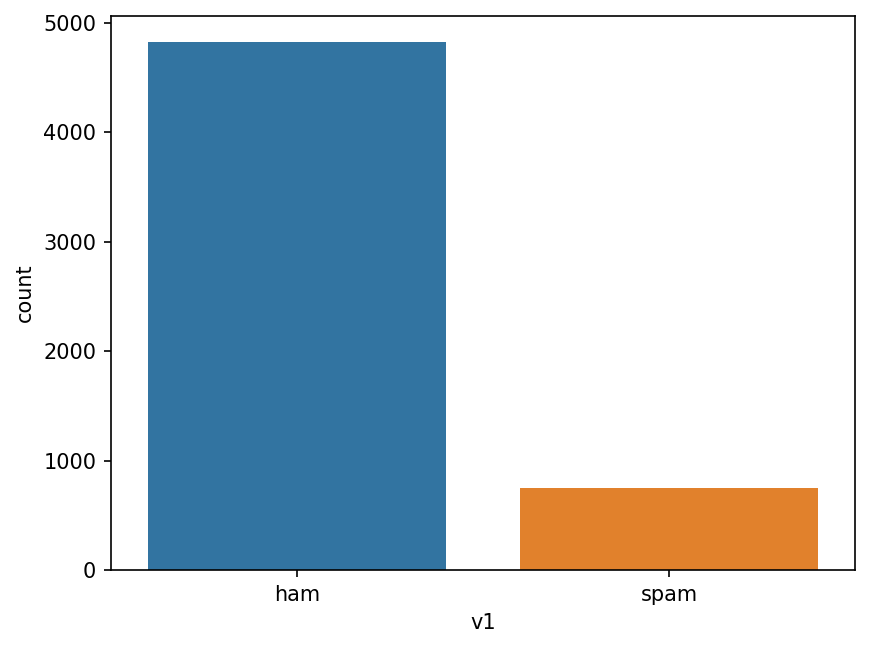

In [15]:
import seaborn as sns
plt.figure(dpi=150)
sns.countplot(data=data,x='v1')
data['v1'].value_counts()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
f = CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"]) 
#fit_transform() - function to vectorize the text 
print(X.shape)

(5572, 8404)


In [19]:
from sklearn.model_selection import train_test_split
y=data["v1"]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(4179, 8404)
(1393, 8404)


In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB() #Created a  model
mnb.fit(X_train,y_train) #Train the model

MultinomialNB()

In [21]:
mnb = round(mnb.score(X_test, y_test)*100,2)
print('accuracy score = ', mnb,'%')

accuracy score =  98.28 %


In [27]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB() #Created a  model
mnb.fit(X_train,y_train)
text_messages=['Free Entry to T20 World cup, text T20 to 82521',
               'you are the lucky winner of the day',
              'collect your prize money, click this link to get it',
              'add Rs. 200000 to your festive season budget with moneytap for credit line in just 4  minutes, click the link to get , prize',
              'get the prize',
              'prize',
              'amazon urgently recruiting for part time jobs, you can earn 20000 to 30000 everyday add whatsapp']
text_messages=f.transform(text_messages)
mnb.predict(text_messages)

array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham'], dtype='<U4')